# ML Assignment 3

In [2]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## read and describe the metadata

In [3]:
# get our metadata
fpn_csv = '/Users/kevin/Documents/ML/ML_assignment_3/cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [4]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [5]:
# show first several entries of data
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


### Create a subset of the columns to fit KMeans

In [8]:
# Choose the columns that best define the clusters and make transformations on existing variables

# Convert categorical variables into dummy variables for use as quantitative values
# art_movement and primary_medium seem to be the most descriptive in categorical context
am = pd.get_dummies(data['art_movement'])
pm = pd.get_dummies(data['primary_medium'])

# Show art movement dummy variables just to see content
print(am)

# Put dummy variables of primary medium into our data
data['pm_drawing'] = pm['drawing']
data['pm_installation'] = pm['installation']
data['pm_painting'] = pm['painting']
data['pm_photography'] = pm['photography']
data['pm_print'] = pm['print']
data['pm_sculpture'] = pm['sculpture']
data['pm_video_film'] = pm['video_film']

# Put dummy variables of art movement into our data
data['am_COBRA'] = am['COBRA']
data['am_Neo-Concrete Movement'] = am['Neo-Concrete Movement']
data['am_ZERO'] = am['ZERO']
data['am_abstract expressionism'] = am['abstract expressionism']
data['am_abstraction'] = am['abstraction']
data['am_arte povera'] = am['arte povera']
data['am_assemblage'] = am['assemblage']
data['am_collage'] = am['collage']
data['am_conceptual'] = am['conceptual']
data['am_constructivism'] = am['constructivism']
data['am_modernism'] = am['modernism']
data['am_op art'] = am['op art']
data['am_pop art'] = am['pop art']
data['am_postminimal'] = am['postminimal']
data['am_postmod'] = am['postmod']
data['am_pre-raphaelite'] = am['pre-raphaelite']
data['am_representation'] = am['representation']
data['am_supports/surfaces'] = am['supports/surfaces']
data['am_surrealism'] = am['suprematism']


     COBRA  Neo-Concrete Movement  ZERO  abstract expressionism  abstraction  \
0        0                      0     0                       0            0   
1        0                      0     0                       0            0   
2        0                      0     0                       0            0   
3        0                      0     0                       0            1   
4        0                      0     0                       0            1   
5        0                      0     0                       0            0   
6        0                      0     0                       0            0   
7        0                      0     0                       0            0   
8        0                      0     0                       0            1   
9        0                      0     0                       0            0   
10       0                      0     0                       0            0   
11       0                      0     0 

In [11]:
# Collect our subset of quantitative values into X
X = data[['pl', 'si', 'va', 'te', 'co', 'or', 'sh','po','li','ar','has_text','reflection', 'kinetic','map',
          'spatial_dimension', 'representation',
         'pm_drawing','pm_installation','pm_painting','pm_photography','pm_print','pm_sculpture','pm_video_film',
         'am_COBRA','am_Neo-Concrete Movement','am_ZERO','am_abstract expressionism','am_abstraction',
          'am_arte povera','am_assemblage','am_collage','am_conceptual','am_constructivism','am_modernism',
         'am_op art','am_pop art','am_postminimal','am_postmod','am_pre-raphaelite','am_representation',
         'am_surrealism']]

# Show properties of our X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(404, 41)


In [12]:
# Show first several entries of X
X.head()

,pl,si,va,te,co,or,sh,po,li,ar,...,am_conceptual,am_constructivism,am_modernism,am_op art,am_pop art,am_postminimal,am_postmod,am_pre-raphaelite,am_representation,am_surrealism
0,2,2,3,0,0,4,3,0,0,5,...,0,0,0,0,0,0,0,0,0,0
1,4,3,1,3,0,3,2,0,0,5,...,0,0,0,0,0,0,0,0,0,0
2,3,0,2,4,4,2,4,0,0,5,...,0,0,1,0,0,0,0,0,0,0
3,4,3,1,2,0,2,4,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,4,1,0,4,0,0,5,...,0,0,0,0,0,0,0,0,0,0


# KMeans

In [13]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

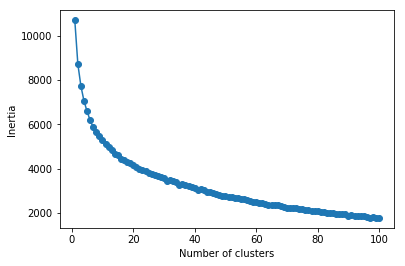

In [219]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [39]:
# Very slight elbow/plateau seems to appear around 7-19 range
# Choose clusters around this range
range_n_clusters = [7, 9, 10, 11, 13, 15, 17, 19]

For n_clusters = 7 The average silhouette_score is : 0.13981284355


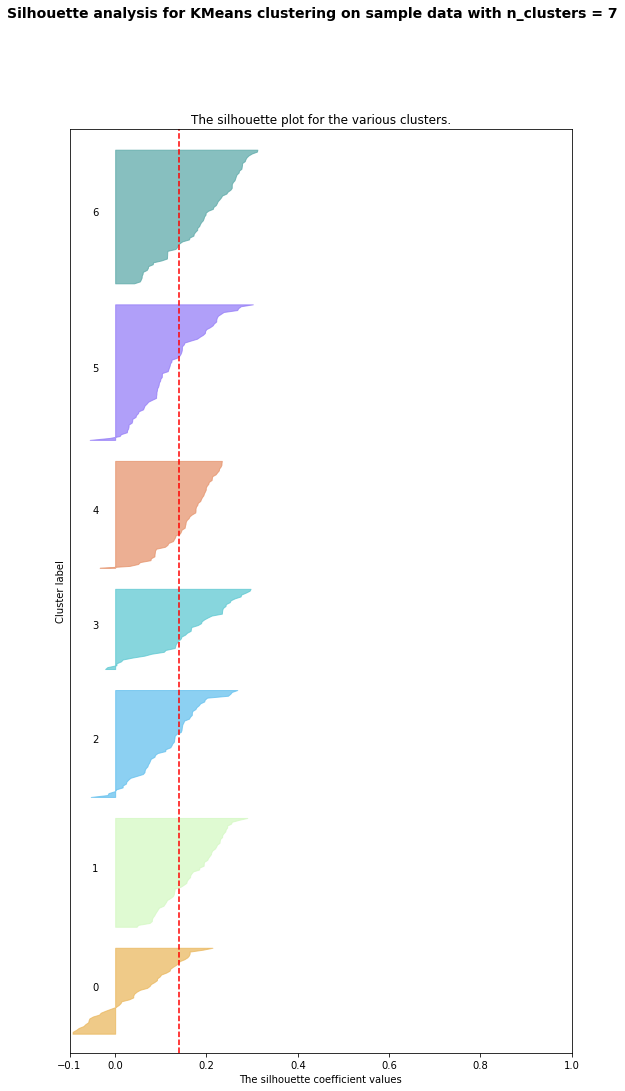

For n_clusters = 9 The average silhouette_score is : 0.142516553561


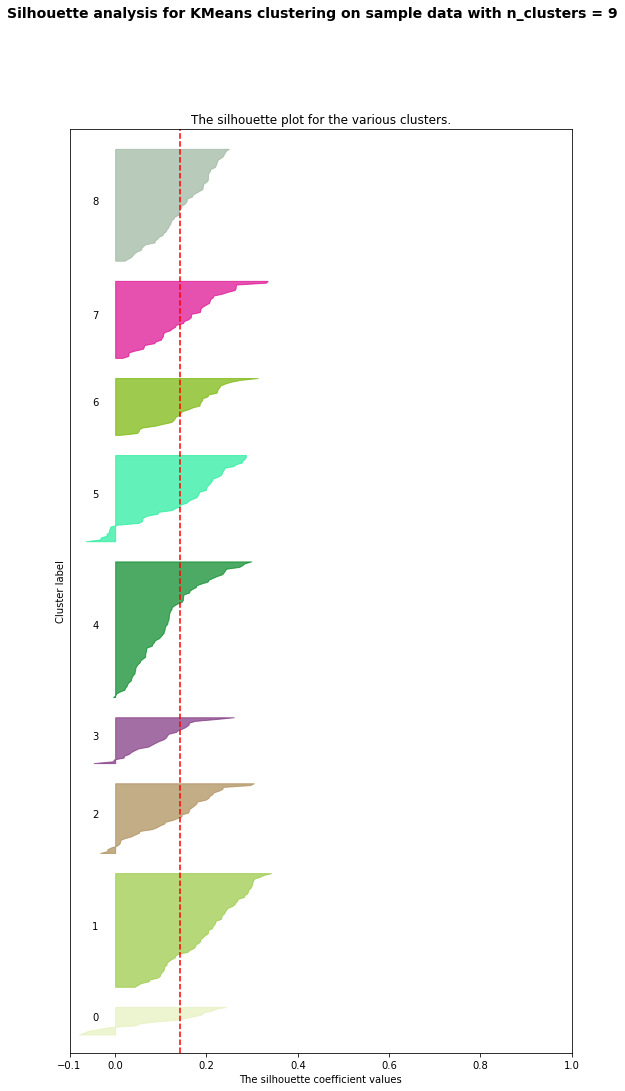

For n_clusters = 10 The average silhouette_score is : 0.141504086092


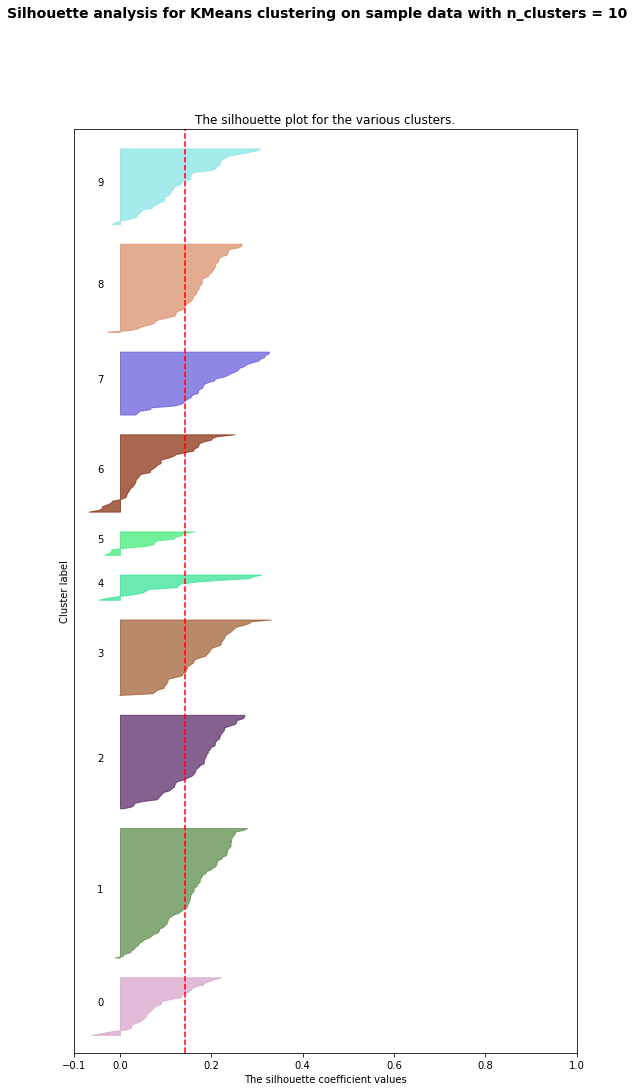

For n_clusters = 11 The average silhouette_score is : 0.140528413192


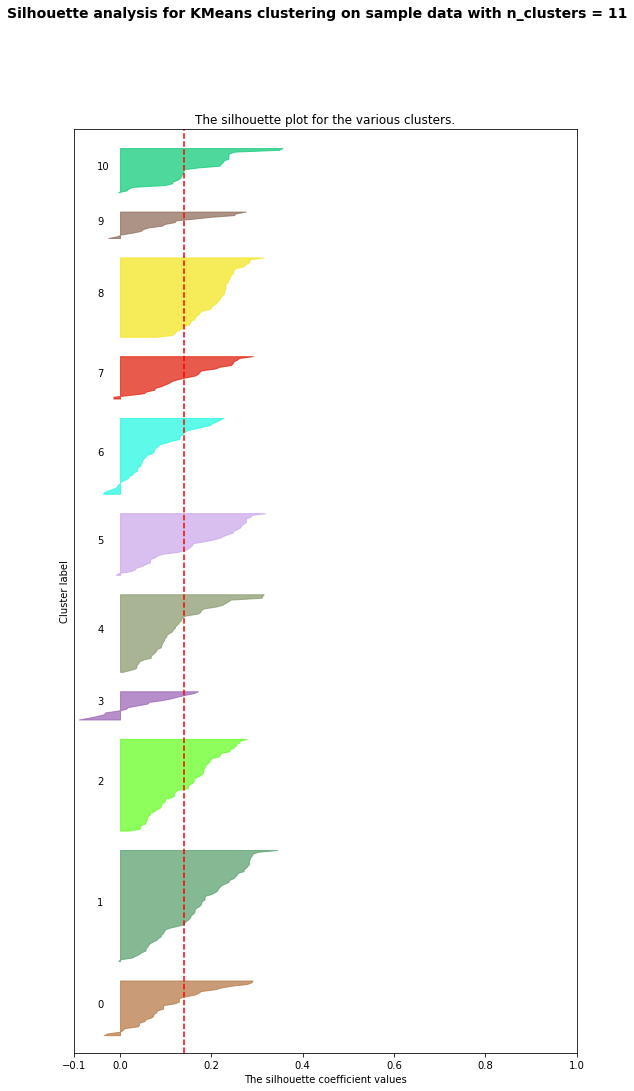

For n_clusters = 13 The average silhouette_score is : 0.134070505273


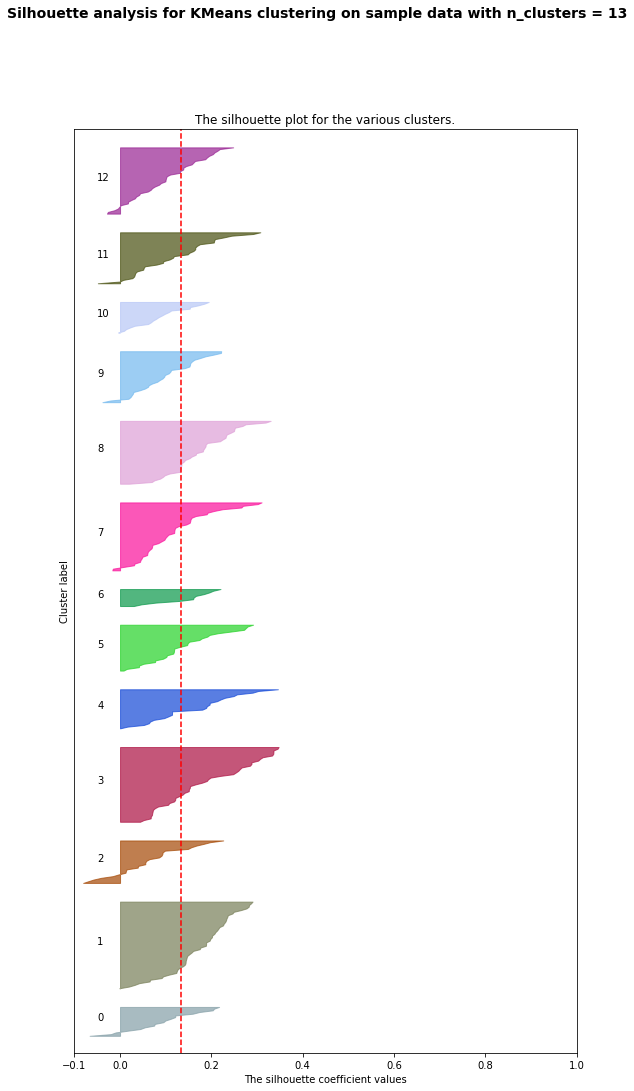

For n_clusters = 15 The average silhouette_score is : 0.134017477229


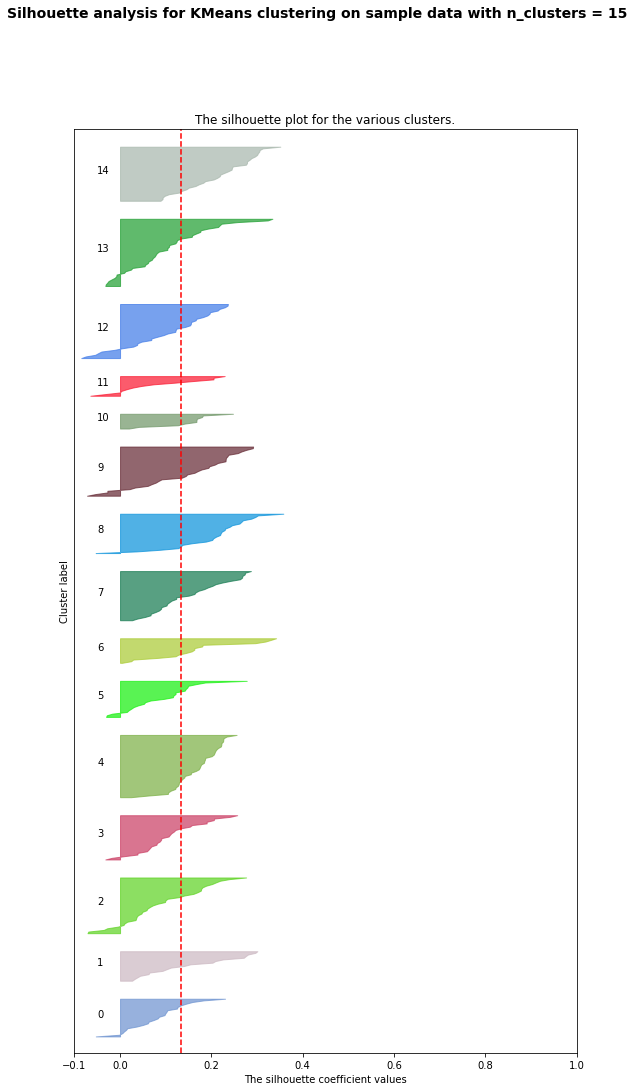

For n_clusters = 17 The average silhouette_score is : 0.131227366716


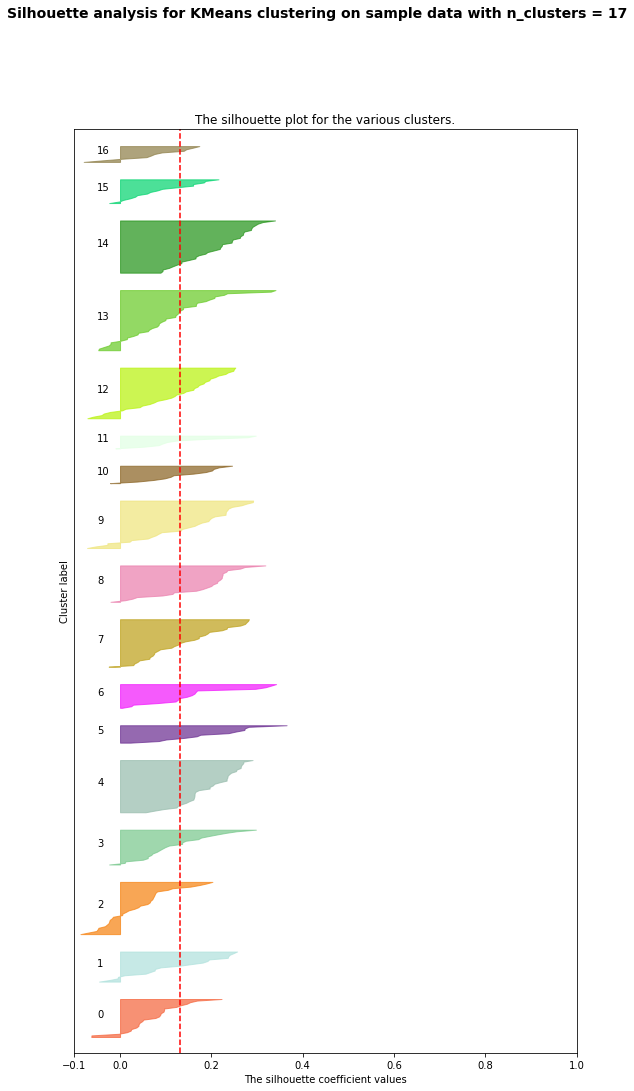

For n_clusters = 19 The average silhouette_score is : 0.129012678777


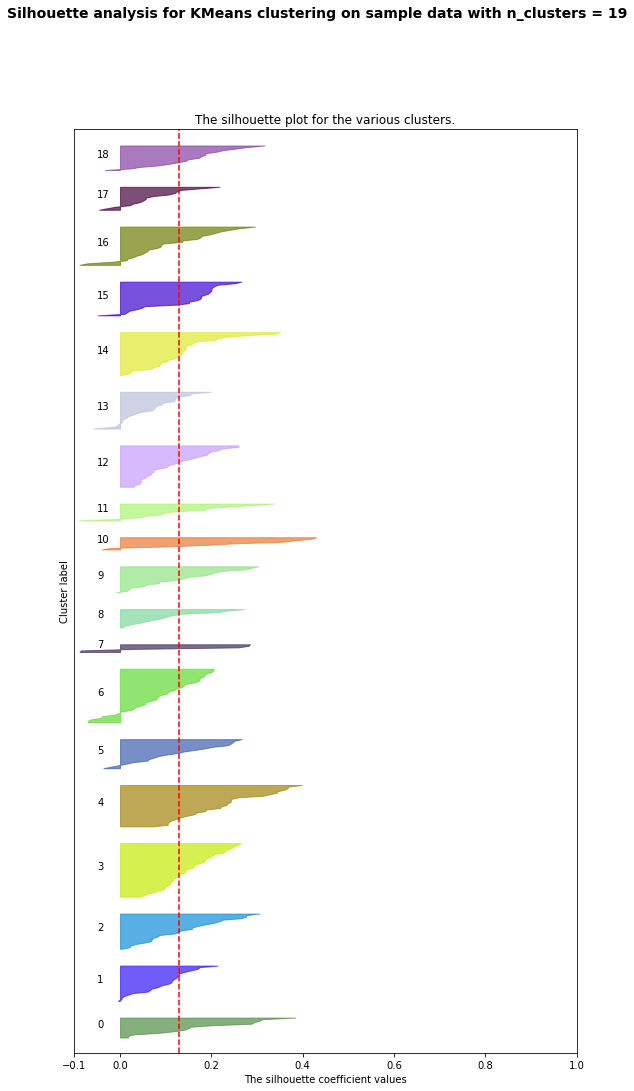

In [40]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# Run silhouette analysis
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### Final fit on KMeans model

In [44]:
# set the number of clusters in the final model
# 10 clusters seem to work out when looking at image results in view_clusters.html created below
my_n_clusters = 10

In [45]:
# Fit on KMeans
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Look at results

In [46]:
# Create a separate file to view the image clusters one by one and see how they look
f = open("view_clusters.html","w")

for i in range(0, max(km.labels_)+1):
    f.write("<br>\n")
    f.write("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * \n")
    f.write("<h3>Images in cluster: " + str(i) + "</h3>\n")
    f.write("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * <br>\n")
    for j in range(0, len(km.labels_)):
        #if km.labels_[j] == km.labels_[i]:
        if km.labels_[j] == i:
            f.write("<img src='" + "/Users/kevin/Documents/ML/ML_assignment_3/img_small/" + str(j+2) + "_small.jpg'>\n")

f.close()
